In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,time,timedelta,date
import math
from pandas.plotting import scatter_matrix
%matplotlib inline

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
df = pd.read_csv('AW_test.csv',parse_dates=[13])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 23 columns):
CustomerID              500 non-null int64
Title                   4 non-null object
FirstName               500 non-null object
MiddleName              284 non-null object
LastName                500 non-null object
Suffix                  1 non-null object
AddressLine1            500 non-null object
AddressLine2            13 non-null object
City                    500 non-null object
StateProvinceName       500 non-null object
CountryRegionName       500 non-null object
PostalCode              500 non-null object
PhoneNumber             500 non-null object
BirthDate               500 non-null datetime64[ns]
Education               500 non-null object
Occupation              500 non-null object
Gender                  500 non-null object
MaritalStatus           500 non-null object
HomeOwnerFlag           500 non-null int64
NumberCarsOwned         500 non-null int64
NumberChildrenA

In [87]:
(df.astype(np.object) == '?').any()  # check on missing values 
                                     # (see DataPreparation.ipynb in Module 3)

CustomerID              False
Title                   False
FirstName               False
MiddleName              False
LastName                False
Suffix                  False
AddressLine1            False
AddressLine2            False
City                    False
StateProvinceName       False
CountryRegionName       False
PostalCode              False
PhoneNumber             False
BirthDate               False
Education               False
Occupation              False
Gender                  False
MaritalStatus           False
HomeOwnerFlag           False
NumberCarsOwned         False
NumberChildrenAtHome    False
TotalChildren           False
YearlyIncome            False
dtype: bool

In [88]:
df.drop_duplicates(subset=['CustomerID'], keep='first', inplace=True)

In [89]:
dv = pd.read_csv('AW_AveMonthSpend.csv')
dg = pd.read_csv('AW_BikeBuyer.csv')

In [90]:
# Check ojn missing values

In [91]:
(dv.astype(np.object) == '?').any()

CustomerID       False
AveMonthSpend    False
dtype: bool

In [92]:
(dg.astype(np.object) == '?').any()

CustomerID    False
BikeBuyer     False
dtype: bool

In [93]:
dv.drop_duplicates(subset=['CustomerID'], keep='first', inplace=True)
dg.drop_duplicates(subset=['CustomerID'], keep='first', inplace=True)

In [94]:
# merge files
f_m = pd.merge(df,dv, how='inner', left_on='CustomerID', right_on='CustomerID')
df_m = pd.merge(f_m,dg,how='inner', left_on='CustomerID', right_on='CustomerID')
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16404 entries, 0 to 16403
Data columns (total 25 columns):
CustomerID              16404 non-null int64
Title                   88 non-null object
FirstName               16404 non-null object
MiddleName              9453 non-null object
LastName                16404 non-null object
Suffix                  2 non-null object
AddressLine1            16404 non-null object
AddressLine2            274 non-null object
City                    16404 non-null object
StateProvinceName       16404 non-null object
CountryRegionName       16404 non-null object
PostalCode              16404 non-null object
PhoneNumber             16404 non-null object
BirthDate               16404 non-null datetime64[ns]
Education               16404 non-null object
Occupation              16404 non-null object
Gender                  16404 non-null object
MaritalStatus           16404 non-null object
HomeOwnerFlag           16404 non-null int64
NumberCarsOwned      

In [95]:
# drop unneccessary columns
df_m.drop(['CustomerID','Title','FirstName','LastName','MiddleName','Suffix','AddressLine1',
           'AddressLine2','StateProvinceName','PhoneNumber','City'], axis=1, inplace=True)

In [96]:
HF_Flag_mapping = {1 : 'yes', 0 : 'no'}
df_m['HomeOwnerFlag']=df_m['HomeOwnerFlag'].map(HF_Flag_mapping)
BB_mapping = {1 : 'yes', 0 : 'no'}
df_m['BikeBuyer']=df_m['BikeBuyer'].map(BB_mapping)
df_m.dtypes

CountryRegionName               object
PostalCode                      object
BirthDate               datetime64[ns]
Education                       object
Occupation                      object
Gender                          object
MaritalStatus                   object
HomeOwnerFlag                   object
NumberCarsOwned                  int64
NumberChildrenAtHome             int64
TotalChildren                    int64
YearlyIncome                     int64
AveMonthSpend                    int64
BikeBuyer                       object
dtype: object

In [97]:
def count_unique(df_m, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(df_m[col].value_counts())
        
cat_cols = ['Education', 'Occupation', 'Gender','MaritalStatus','CountryRegionName','BikeBuyer','HomeOwnerFlag']
count_unique(df_m, cat_cols)


For column Education
Bachelors              4758
Partial College        4451
High School            2944
Graduate Degree        2851
Partial High School    1400
Name: Education, dtype: int64

For column Occupation
Professional      4922
Skilled Manual    4038
Management        2718
Clerical          2597
Manual            2129
Name: Occupation, dtype: int64

For column Gender
M    8290
F    8114
Name: Gender, dtype: int64

For column MaritalStatus
M    8852
S    7552
Name: MaritalStatus, dtype: int64

For column CountryRegionName
United States     6935
Australia         3194
United Kingdom    1709
France            1591
Germany           1577
Canada            1398
Name: CountryRegionName, dtype: int64

For column BikeBuyer
no     10953
yes     5451
Name: BikeBuyer, dtype: int64

For column HomeOwnerFlag
yes    11058
no      5346
Name: HomeOwnerFlag, dtype: int64


In [98]:
# regarding bikes not bought we have a relationship of 2:1 ==> class imbalance

In [99]:
print(df_m.groupby(['BikeBuyer'])['HomeOwnerFlag'].value_counts())

BikeBuyer  HomeOwnerFlag
no         yes              7383
           no               3570
yes        yes              3675
           no               1776
Name: HomeOwnerFlag, dtype: int64


In [100]:
print(df_m['AveMonthSpend'].median())

68.0


In [101]:
print(df_m.groupby(['Occupation'])['YearlyIncome'].median())

Occupation
Clerical           49481.0
Management        118781.0
Manual             21722.0
Professional       99051.5
Skilled Manual     66471.5
Name: YearlyIncome, dtype: float64


In [102]:
df_m['Ref_date']=date(year = 1998, month = 1, day = 1)
df_m['Ref_date']=pd.to_datetime(df_m['Ref_date'])
df_m['Age_days'] = df_m['Ref_date']- df_m['BirthDate']
df_m['Age'] =  df_m['Age_days'].astype('timedelta64[Y]')

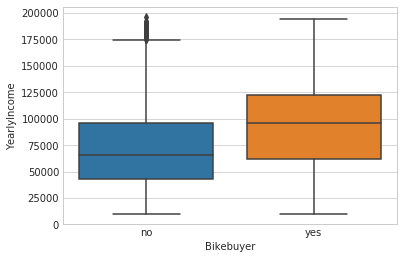

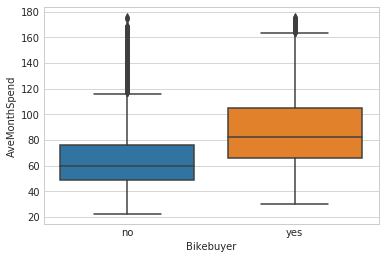

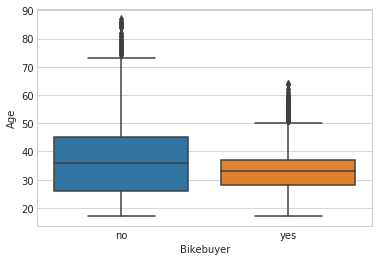

In [103]:
def plot_box(df_m, cols):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot('BikeBuyer', col, data=df_m)
        plt.xlabel('Bikebuyer')   # Set text for the x axis
        plt.ylabel(col)           # Set text for y axis
        plt.show()
        
cat_cols = ['YearlyIncome','AveMonthSpend','Age']
plot_box(df_m, cat_cols)    

In [104]:
# YearlyIncome and AveMonthSpend discrimate better than Age; AveMonthSpend better than YearlyIncome

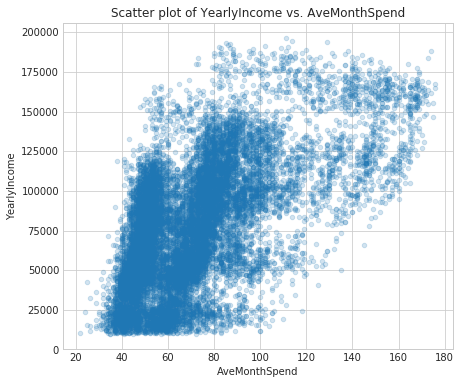

In [105]:
def plot_scatter_t(df, cols, col_y = 'YearlyIncome', alpha = 1.0):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca()                  # define axis   
        df_m.plot.scatter(x = col, y = col_y, ax = ax, alpha = alpha)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col)   # Set text for the x axis
        ax.set_ylabel(col_y) # Set text for y axis
        plt.show()
num_cols = ['AveMonthSpend']
plot_scatter_t(df_m, num_cols, alpha = 0.2)     

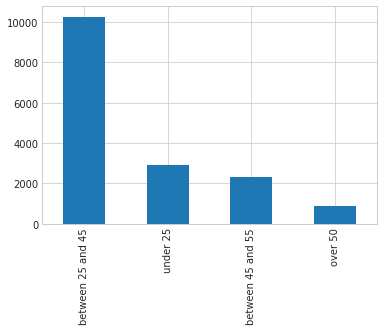

In [106]:
df_m['Age_Cat'] = ['under 25' if ((x < 25)) 
                   else 'between 25 and 45' if ((x>=25 and x<=45)) 
                   else 'between 45 and 55' if ((x>45  and x<=55))
                   else 'over 50' if ((x>55))
                   else x for x in df_m['Age']]
df_m['Age_Cat'].value_counts().plot(kind='bar')

In [107]:
print(df_m.groupby(['Gender','Age_Cat'])['AveMonthSpend'].sum())

Gender  Age_Cat          
F       between 25 and 45    302664
        between 45 and 55     64905
        over 50               21367
        under 25              70476
M       between 25 and 45    485678
        between 45 and 55    103773
        over 50               30931
        under 25             107690
Name: AveMonthSpend, dtype: int64


In [108]:
print(df_m.groupby(['MaritalStatus'])['AveMonthSpend'].median())

MaritalStatus
M    74
S    62
Name: AveMonthSpend, dtype: int64


In [109]:
print(df_m.groupby(['NumberCarsOwned'])['AveMonthSpend'].median())

NumberCarsOwned
0     65
1     63
2     64
3     92
4    100
Name: AveMonthSpend, dtype: int64


In [110]:
print(df_m.groupby(['Gender'])['AveMonthSpend'].median())

Gender
F    52
M    79
Name: AveMonthSpend, dtype: int64


In [111]:
f = lambda x: x.max()-x.min()
df_m.groupby(['Gender'])['AveMonthSpend'].apply(f)

Gender
F     92
M    147
Name: AveMonthSpend, dtype: int64

In [112]:
print(df_m.groupby(['NumberChildrenAtHome'])['AveMonthSpend'].median())

NumberChildrenAtHome
0     57
1     68
2     79
3     90
4    101
5    110
Name: AveMonthSpend, dtype: int64


In [113]:
print(df_m.groupby(['BikeBuyer'])['YearlyIncome'].median())

BikeBuyer
no     65954
yes    96084
Name: YearlyIncome, dtype: int64


In [114]:
print(df_m.groupby(['BikeBuyer'])['NumberCarsOwned'].median())

BikeBuyer
no     1
yes    2
Name: NumberCarsOwned, dtype: int64


In [115]:
print(df_m.groupby(['BikeBuyer'])['CountryRegionName'].value_counts())

BikeBuyer  CountryRegionName
no         United States        4787
           Australia            1973
           France               1126
           United Kingdom       1095
           Germany              1031
           Canada                941
yes        United States        2148
           Australia            1221
           United Kingdom        614
           Germany               546
           France                465
           Canada                457
Name: CountryRegionName, dtype: int64


In [116]:
print(df_m.groupby(['CountryRegionName'])['PostalCode'].value_counts())

CountryRegionName  PostalCode
Australia          2036          141
                   3977          101
                   4551           98
                   1002           97
                   3220           97
                   2580           96
                   4000           96
                   4655           95
                   3429           94
                   4810           94
                   2500           92
                   3000           92
                   3280           92
                   3550           92
                   7001           92
                   3337           90
                   4217           90
                   4700           89
                   2450           88
                   2444           82
                   3198           76
                   4171           76
                   2061           75
                   4169           75
                   1597           74
                   2065           73
        

In [117]:
df_m['CountryRegionName']= df_m['CountryRegionName'].astype('category')
df_m['Education']= df_m['Education'].astype('category')
df_m['Occupation']= df_m['Occupation'].astype('category')
df_m['Gender']= df_m['Gender'].astype('category')
df_m['MaritalStatus']= df_m['MaritalStatus'].astype('category')
df_m['Age_Cat']= df_m['Age_Cat'].astype('category')
df_m['BikeBuyer']= df_m['BikeBuyer'].astype('category')
df_m['HomeOwnerFlag']=df_m['HomeOwnerFlag'].astype('category')
df_m['PostalCode']=pd.to_numeric(df_m['PostalCode'],errors='coerce')

In [118]:
df_m.dtypes

CountryRegionName              category
PostalCode                      float64
BirthDate                datetime64[ns]
Education                      category
Occupation                     category
Gender                         category
MaritalStatus                  category
HomeOwnerFlag                  category
NumberCarsOwned                   int64
NumberChildrenAtHome              int64
TotalChildren                     int64
YearlyIncome                      int64
AveMonthSpend                     int64
BikeBuyer                      category
Ref_date                 datetime64[ns]
Age_days                timedelta64[ns]
Age                             float64
Age_Cat                        category
dtype: object

Occupation


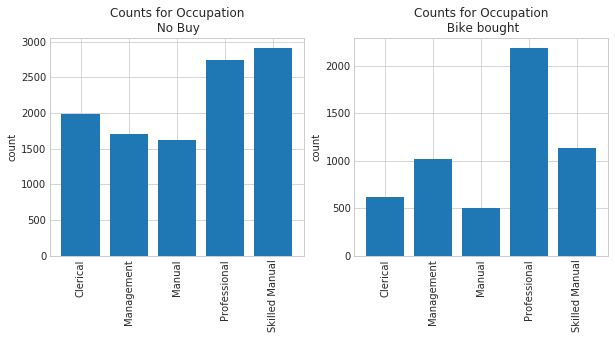

Gender


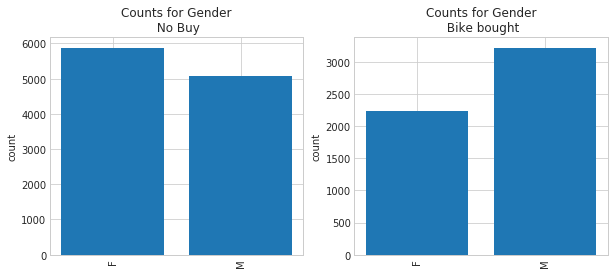

MaritalStatus


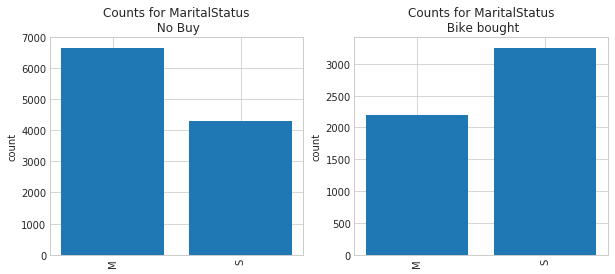

Age_Cat


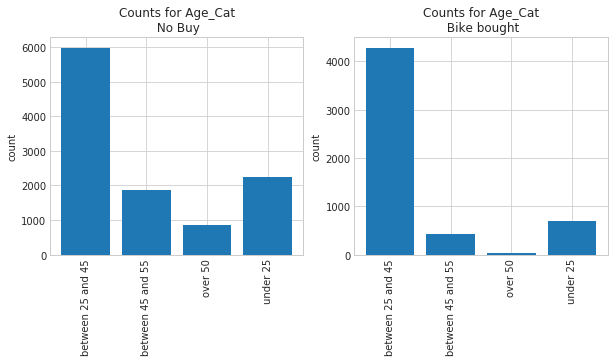

CountryRegionName


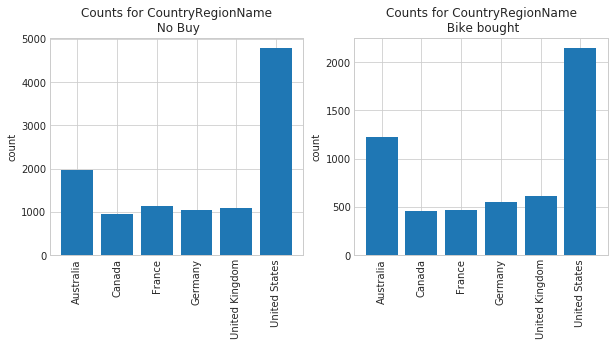

Education


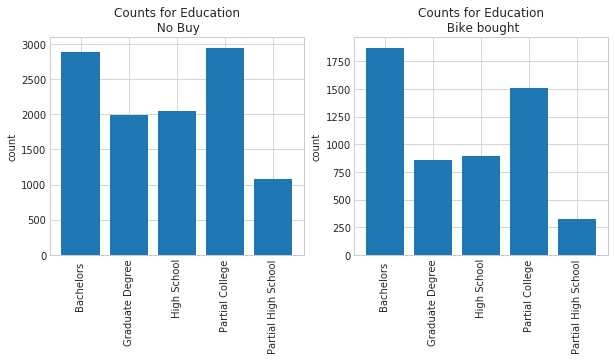

In [119]:
import numpy as np
cat_cols = ['Occupation','Gender','MaritalStatus','Age_Cat','CountryRegionName','Education']
df_m['dummy'] = np.ones(shape = df_m.shape[0])
for col in cat_cols:
    print(col)
    counts = df_m[['dummy', 'BikeBuyer', col]].groupby(['BikeBuyer', col], as_index = False).count()
    temp = counts[counts['BikeBuyer'] == 'no'][[col, 'dummy']]
    _ = plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    temp = counts[counts['BikeBuyer'] == 'no'][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n No Buy')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    temp = counts[counts['BikeBuyer'] == 'yes'][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Bike bought')
    plt.ylabel('count')
    plt.show()

In [120]:
df_m.drop(['BirthDate','Age_Cat','Age_days','dummy','Ref_date','PostalCode'], 
          axis=1, inplace=True)

In [128]:
df_m.describe()

,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,log_Income,log_Age,log_AveMonthSpend
count,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000
mean,1.499756,0.991100,2.004511,11.102220,3.517759,4.220003
std,1.139135,1.514278,1.682318,0.624963,0.319316,0.344490
min,0.000000,0.000000,0.000000,9.157151,2.833213,3.091042
25%,1.000000,0.000000,0.000000,10.775027,3.295837,3.951244
50%,2.000000,0.000000,2.000000,11.240132,3.526361,4.219508
75%,2.000000,2.000000,3.000000,11.563621,3.761200,4.430817
max,4.000000,5.000000,5.000000,12.188474,4.465908,5.170484


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


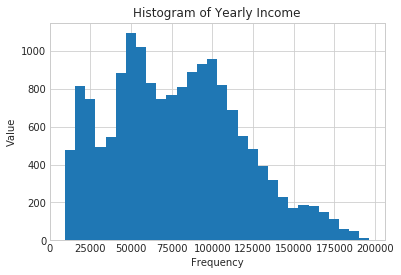

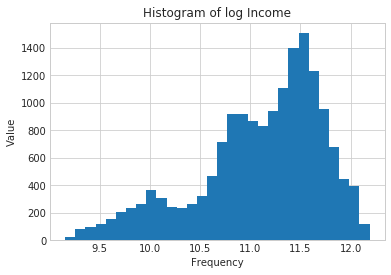

In [121]:
## Distribution plot of Income values
def hist_plot(vals,lab):
    fig = plt.figure()
    axes1 = fig.add_subplot(1,1,1)
    axes1.hist(vals,bins=30)
    axes1.set_title('Histogram of'+ lab)
    axes1.set_xlabel('Frequency')
    axes1.set_ylabel('Value')
    fig.show()
    return

hist_plot(df_m['YearlyIncome'],' Yearly Income')

# transform to log

df_m['log_Income'] = np.log(df_m['YearlyIncome'])
hist_plot(df_m['log_Income'],' log Income')

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


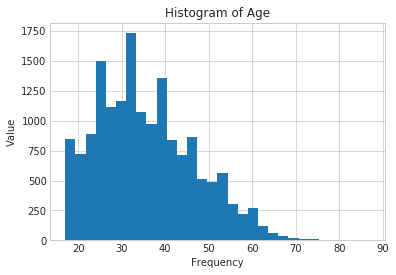

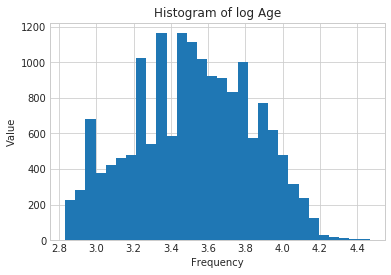

In [122]:
df_m['log_Age'] = np.log(df_m['Age'])
hist_plot(df_m['Age'],' Age')
hist_plot(df_m['log_Age'],' log Age')

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


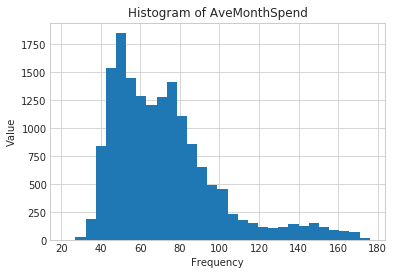

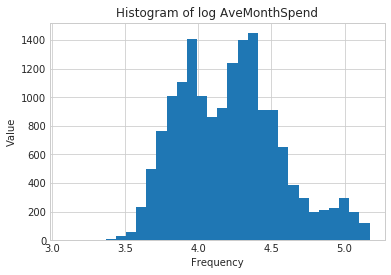

In [123]:
df_m['log_AveMonthSpend'] = np.log(df_m['AveMonthSpend'])
hist_plot(df_m['AveMonthSpend'],' AveMonthSpend')
hist_plot(df_m['log_AveMonthSpend'],' log AveMonthSpend')

In [124]:
df_m.drop(['YearlyIncome','Age','AveMonthSpend','HomeOwnerFlag'], axis=1, inplace=True)

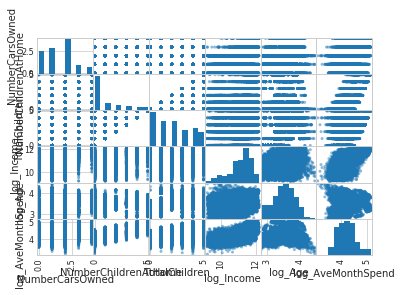

In [125]:
scatter_matrix(df_m)
plt.show()

In [126]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16404 entries, 0 to 16403
Data columns (total 12 columns):
CountryRegionName       16404 non-null category
Education               16404 non-null category
Occupation              16404 non-null category
Gender                  16404 non-null category
MaritalStatus           16404 non-null category
NumberCarsOwned         16404 non-null int64
NumberChildrenAtHome    16404 non-null int64
TotalChildren           16404 non-null int64
BikeBuyer               16404 non-null category
log_Income              16404 non-null float64
log_Age                 16404 non-null float64
log_AveMonthSpend       16404 non-null float64
dtypes: category(6), float64(3), int64(3)
memory usage: 1.6 MB


In [129]:
df_m.to_csv('Bike_Buyer_Preped.csv', index = False, header = True)